In [294]:
#%pip install sqlalchemy matplotsoccer mplsoccer dotenv pandas -q


Connect to DB

In [295]:
import pandas as pd
import psycopg2
import dotenv
import os

dotenv.load_dotenv()

PG_PASSWORD = os.getenv("PG_PASSWORD")
PG_USER = os.getenv("PG_USER")
PG_HOST = os.getenv("PG_HOST")
PG_PORT = os.getenv("PG_PORT")
PG_DATABASE = os.getenv("PG_DB")

conn = psycopg2.connect(
    host=PG_HOST,
    database=PG_DATABASE,
    user=PG_USER,
    password=PG_PASSWORD,
    port=PG_PORT,
    sslmode="require",
)




Filter on ball side

In [296]:
query = """
SELECT spa.* , m.home_team_id, m.away_team_id, me.ball_owning_team, t.team_name, p.player_name
FROM spadl_actions spa
JOIN matches m on spa.game_id = m.match_id
JOIN matchevents me on m.match_id = me.match_id
JOIN players p on spa.player_id = p.player_id
JOIN teams t on p.team_id = t.team_id
WHERE game_id = '6p4xcllb1x7vx1xljrk14gbh0' AND start_x < 50
ORDER BY seconds ASC
"""


ball_pos = pd.read_sql_query(query, conn)
ball_pos.describe()
ball_pos.head()




id                    game_id  period_id  seconds  \
0  156306  6p4xcllb1x7vx1xljrk14gbh0          2      1.0   
1  156306  6p4xcllb1x7vx1xljrk14gbh0          2      1.0   
2  156306  6p4xcllb1x7vx1xljrk14gbh0          2      1.0   
3  156306  6p4xcllb1x7vx1xljrk14gbh0          2      1.0   
4  156306  6p4xcllb1x7vx1xljrk14gbh0          2      1.0   

                   player_id                    team_id  start_x  start_y  \
0  5ecklu1u6t21rhh8fh4zoq2cq  920raeoumft3q2wmvc296uceo    43.47   38.284   
1  5ecklu1u6t21rhh8fh4zoq2cq  920raeoumft3q2wmvc296uceo    43.47   38.284   
2  5ecklu1u6t21rhh8fh4zoq2cq  920raeoumft3q2wmvc296uceo    43.47   38.284   
3  5ecklu1u6t21rhh8fh4zoq2cq  920raeoumft3q2wmvc296uceo    43.47   38.284   
4  5ecklu1u6t21rhh8fh4zoq2cq  920raeoumft3q2wmvc296uceo    43.47   38.284   

   end_x   end_y action_type result bodypart               home_team_id  \
0   46.2  39.576          21      1        0  920raeoumft3q2wmvc296uceo   
1   46.2  39.576          21      1        0  920raeoumft3q2wmvc296uceo   
2   46.2  39.576          21      1        0  920raeoumft3q2wmvc296uceo   
3   46.2  39.576          21      1        0  920raeoumft3q2wmvc296uceo   
4   46.2  39.576          21      1        0  920raeoumft3q2wmvc296uceo   

                away_team_id           ball_owning_team           team_name  \
0  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c  Sporting Charleroi   
1  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c  Sporting Charleroi   
2  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c  Sporting Charleroi   
3  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c  Sporting Charleroi   
4  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c  Sporting Charleroi   

  player_name  
0  A. Zorgane  
1  A. Zorgane  
2  A. Zorgane  
3  A. Zorgane  
4  A. Zorgane

In [297]:
print(ball_pos.duplicated().sum())

ball_pos = ball_pos.drop_duplicates(subset=['game_id', 'start_x', 'start_y'], keep='last')

print(ball_pos.duplicated().sum())

956664
0


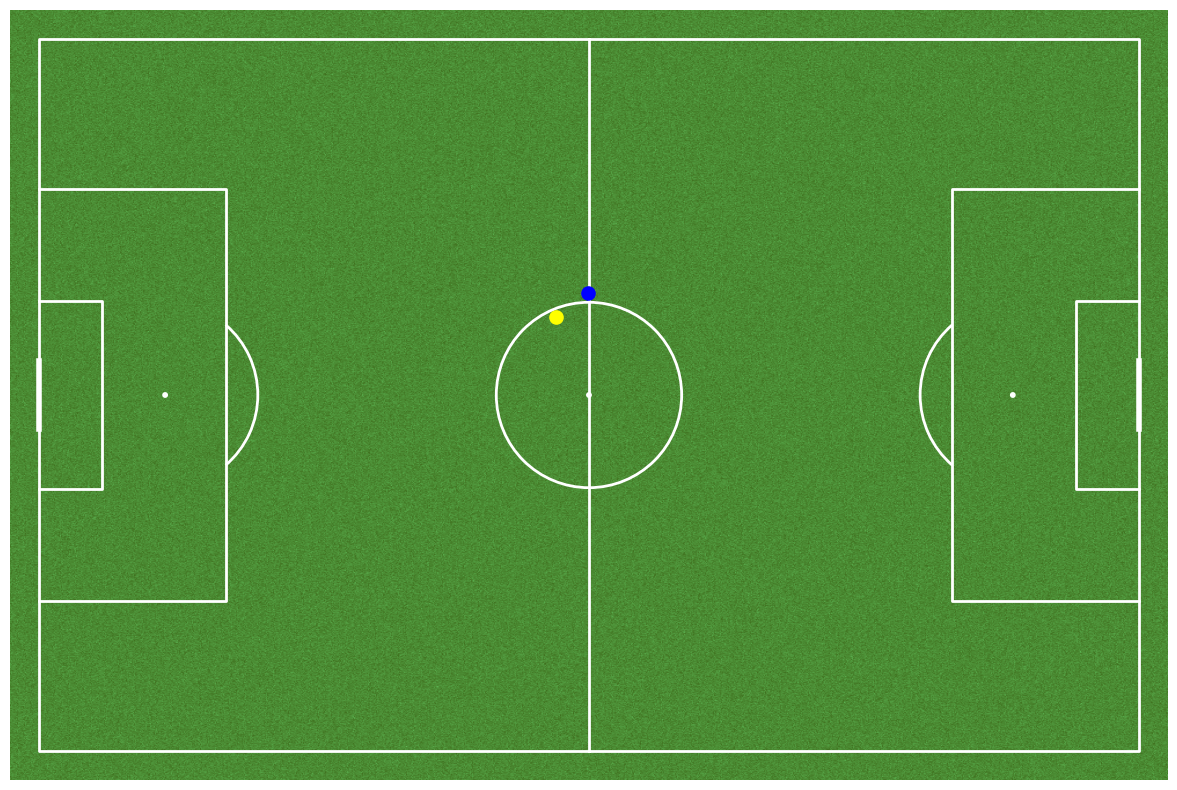

In [298]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from IPython.display import display, clear_output
import time  # Optional, for adding delay between frames

def plotting_data(tracking_data):
    clear_output(wait=True)  # Clears previous output to avoid overlapping plots
    
    pitch = Pitch(pitch_color='grass', line_color='white', pitch_type='opta', pitch_length=105, pitch_width=68)
    fig, ax = pitch.draw(figsize=(12, 8))

    pitch.scatter(tracking_data['start_x'], tracking_data['start_y'], s=90, color='yellow', ax=ax, label='Ball')
    pitch.scatter(tracking_data['end_x'], tracking_data['end_y'], s=90, color='blue', ax=ax, label='Ball')

    plt.show()

# Loop through ball positions, updating the plot each time

plotting_data(ball_pos.iloc[2])
  # Optional delay for a smooth animation effect


Loaded 601 SPADL actions


id                    game_id  period_id  seconds  \
1549  156306  6p4xcllb1x7vx1xljrk14gbh0          2      1.0   
3099  156307  6p4xcllb1x7vx1xljrk14gbh0          2      2.0   
4649  156310  6p4xcllb1x7vx1xljrk14gbh0          2      6.0   
6199  156311  6p4xcllb1x7vx1xljrk14gbh0          2      7.0   
7749  156312  6p4xcllb1x7vx1xljrk14gbh0          2      7.5   

                      player_id                    team_id  start_x  start_y  \
1549  5ecklu1u6t21rhh8fh4zoq2cq  920raeoumft3q2wmvc296uceo   43.470   38.284   
3099  5ecklu1u6t21rhh8fh4zoq2cq  920raeoumft3q2wmvc296uceo   46.200   39.576   
4649  aojrff0lrdwjyyvsbpd39h7f9  920raeoumft3q2wmvc296uceo   47.040   60.928   
6199  aojrff0lrdwjyyvsbpd39h7f9  920raeoumft3q2wmvc296uceo   49.875   64.260   
7749  5ecklu1u6t21rhh8fh4zoq2cq  920raeoumft3q2wmvc296uceo   45.885   49.164   

       end_x   end_y action_type result bodypart               home_team_id  \
1549  46.200  39.576          21      1        0  920raeoumft3q2wmvc296uceo   
3099  57.225  59.772           0      1        0  920raeoumft3q2wmvc296uceo   
4649  49.875  64.260          21      1        0  920raeoumft3q2wmvc296uceo   
6199  45.885  49.164           0      1        0  920raeoumft3q2wmvc296uceo   
7749  46.305  53.720          21      1        0  920raeoumft3q2wmvc296uceo   

                   away_team_id           ball_owning_team  \
1549  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
3099  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
4649  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
6199  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
7749  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   

               team_name  player_name  
1549  Sporting Charleroi   A. Zorgane  
3099  Sporting Charleroi   A. Zorgane  
4649  Sporting Charleroi  V. Dragsnes  
6199  Sporting Charleroi  V. Dragsnes  
7749  Sporting Charleroi   A. Zorgane

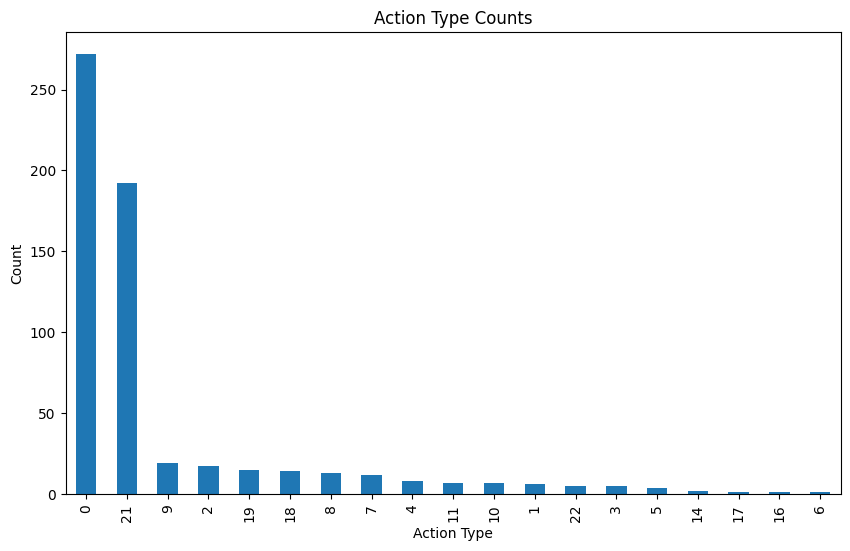

In [299]:


spadl_df = ball_pos
print(f"Loaded {len(spadl_df)} SPADL actions")

display(spadl_df.head())

action_counts = spadl_df['action_type'].value_counts()
plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar')
plt.title('Action Type Counts')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.show()


In [300]:
import socceraction.spadl as spadl
import socceraction.spadl.config as spadlconfig

# Ensure correct column names
spadl_df = spadl_df.rename(columns={"action_type": "type_id"})

# Ensure type_id is an integer
spadl_df["type_id"] = spadl_df["type_id"].astype(int)
spadl_df["result_id"] = spadl_df["result"].astype(int)
spadl_df["bodypart_id"] = spadl_df["bodypart"].astype(int)



# Apply add_names to map numeric values to labels
spadl_df = spadl.add_names(spadl_df)



action_types = spadlconfig.actiontypes_df()
print(action_types)


    type_id         type_name
0         0              pass
1         1             cross
2         2          throw_in
3         3  freekick_crossed
4         4    freekick_short
5         5    corner_crossed
6         6      corner_short
7         7           take_on
8         8              foul
9         9            tackle
10       10      interception
11       11              shot
12       12      shot_penalty
13       13     shot_freekick
14       14       keeper_save
15       15      keeper_claim
16       16      keeper_punch
17       17    keeper_pick_up
18       18         clearance
19       19         bad_touch
20       20        non_action
21       21           dribble
22       22          goalkick


In [301]:
spadl_df.head()

spadl_df

spadl

<module 'socceraction.spadl' from 'c:\\Users\\dhend\\Documents\\2TI-3AI\\Advanced-AI\\course-material\\.venv\\Lib\\site-packages\\socceraction\\spadl\\__init__.py'>

In [302]:
spadl_df[spadl_df['result_id'] == 0]

id                    game_id  period_id  seconds  \
30999   155550  6p4xcllb1x7vx1xljrk14gbh0          1     53.0   
32549   156332  6p4xcllb1x7vx1xljrk14gbh0          2     67.0   
37199   156334  6p4xcllb1x7vx1xljrk14gbh0          2     70.0   
44949   156340  6p4xcllb1x7vx1xljrk14gbh0          2     84.0   
51149   156345  6p4xcllb1x7vx1xljrk14gbh0          2     90.0   
...        ...                        ...        ...      ...   
906749  157021  6p4xcllb1x7vx1xljrk14gbh0          2   2868.0   
909849  157022  6p4xcllb1x7vx1xljrk14gbh0          2   2871.0   
926899  157035  6p4xcllb1x7vx1xljrk14gbh0          2   2920.0   
931549  157038  6p4xcllb1x7vx1xljrk14gbh0          2   2941.0   
950149  157061  6p4xcllb1x7vx1xljrk14gbh0          2   2985.0   

                        player_id                    team_id  start_x  \
30999   1g0hx1y7bkrsbf4t9fag0xmy2  920raeoumft3q2wmvc296uceo   39.165   
32549    upsv29k59dhj8w1nm3oqveok  bw9wm8pqfzcchumhiwdt2w15c   34.650   
37199    i5s78vnnpjbs05skodkpk9hw  920raeoumft3q2wmvc296uceo   40.635   
44949   7swhmqhii6ny7eod10df6dc6h  920raeoumft3q2wmvc296uceo   39.690   
51149    upsv29k59dhj8w1nm3oqveok  bw9wm8pqfzcchumhiwdt2w15c   23.415   
...                           ...                        ...      ...   
906749  6y2s58f539ax7s9np2jao0tn8  bw9wm8pqfzcchumhiwdt2w15c   10.290   
909849  6y2s58f539ax7s9np2jao0tn8  bw9wm8pqfzcchumhiwdt2w15c    2.520   
926899  ccu7hw3wrcspl1a18g2ldnsh5  920raeoumft3q2wmvc296uceo   35.070   
931549  dkr81i8fhdw195l8xyexge1d6  bw9wm8pqfzcchumhiwdt2w15c   16.800   
950149  f09fob6aosvvlheynznavew2x  bw9wm8pqfzcchumhiwdt2w15c   26.880   

        start_y   end_x   end_y  ...               home_team_id  \
30999    16.116  78.015  23.120  ...  920raeoumft3q2wmvc296uceo   
32549     6.664  34.650   6.664  ...  920raeoumft3q2wmvc296uceo   
37199     1.224  40.635   1.224  ...  920raeoumft3q2wmvc296uceo   
44949     0.068  38.745  16.456  ...  920raeoumft3q2wmvc296uceo   
51149    28.424  23.415  28.424  ...  920raeoumft3q2wmvc296uceo   
...         ...     ...     ...  ...                        ...   
906749   66.708  10.290  66.708  ...  920raeoumft3q2wmvc296uceo   
909849   65.484   2.520  65.484  ...  920raeoumft3q2wmvc296uceo   
926899   52.632  35.070  52.632  ...  920raeoumft3q2wmvc296uceo   
931549   65.348  16.800  65.348  ...  920raeoumft3q2wmvc296uceo   
950149   33.116  22.470  33.388  ...  920raeoumft3q2wmvc296uceo   

                     away_team_id           ball_owning_team  \
30999   bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
32549   bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
37199   bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
44949   bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
51149   bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
...                           ...                        ...   
906749  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
909849  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
926899  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
931549  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   
950149  bw9wm8pqfzcchumhiwdt2w15c  bw9wm8pqfzcchumhiwdt2w15c   

                 team_name   player_name result_id bodypart_id  type_name  \
30999   Sporting Charleroi   Aiham Ousou         0           0       pass   
32549            OH Leuven  C. Ikwuemesi         0           2  bad_touch   
37199   Sporting Charleroi   Y. Titraoui         0           0    take_on   
44949   Sporting Charleroi     J. Pétris         0           0       pass   
51149            OH Leuven  C. Ikwuemesi         0           0  bad_touch   
...                    ...           ...       ...         ...        ...   
906749           OH Leuven      M. Osifo         0           0  bad_touch   
909849           OH Leuven      M. Osifo         0           0       foul   
926899          Anderlecht      A. Flips         0           0  bad_touch   
931549    

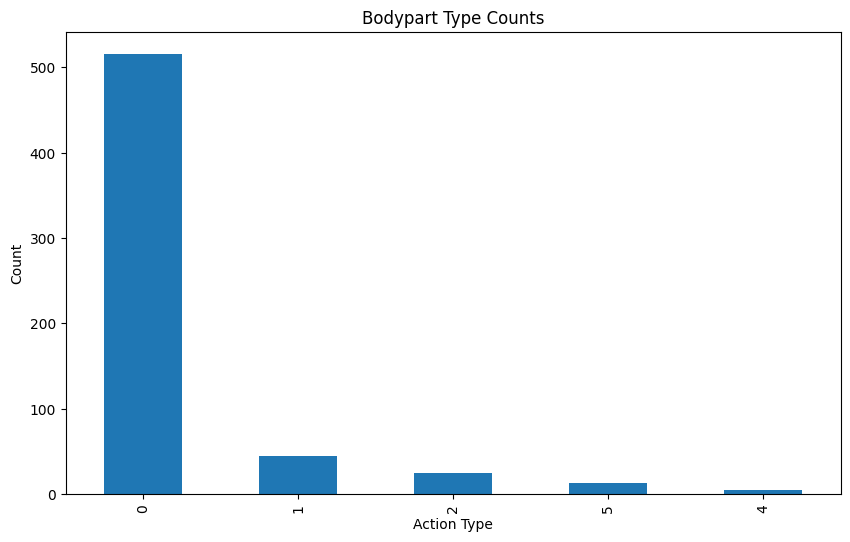

In [303]:



action_counts = spadl_df['bodypart_id'].value_counts()
plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar')
plt.title('Bodypart Type Counts')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.show()


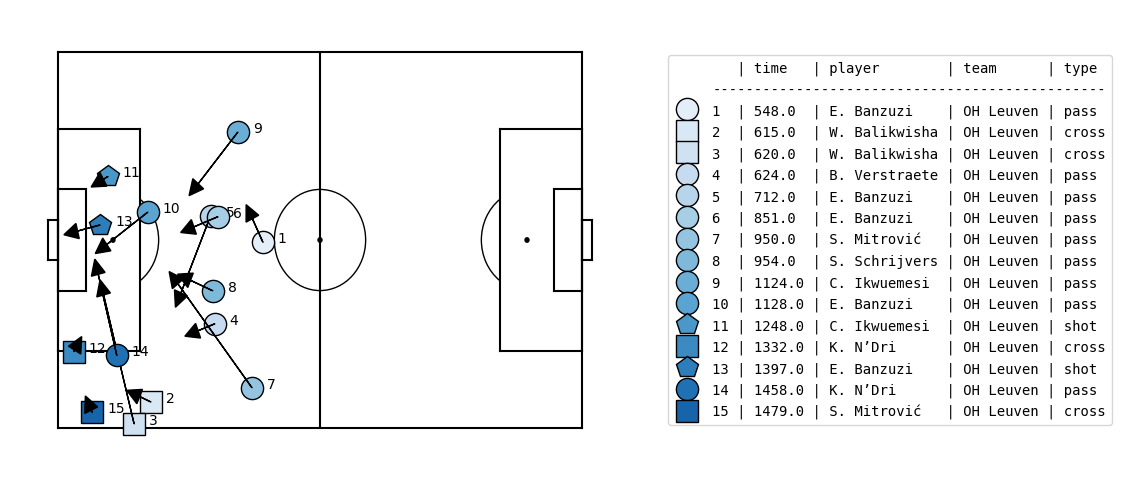

None

In [304]:
import matplotsoccer
spadl_df.head()


spadl_df2 = spadl_df[spadl_df['type_name'].isin(['pass', 'shot', 'cross']) ]
spadl_df3 = spadl_df2[spadl_df2['away_team_id'] == spadl_df2['team_id'] ]
spadl_df3 = spadl_df3[spadl_df3['result_id'] == 0]

times_array = spadl_df3['seconds']

df_time = pd.DataFrame(times_array)

# Take a slice of your spadl_df data
spadl_actions = spadl_df3.iloc[0:15]

# Pass the correct figsize as a tuple (width, height)
ax = matplotsoccer.actions(
    location=spadl_actions[['start_x', 'start_y', 'end_x', 'end_y']],
    action_type=spadl_actions.type_name,
    team=spadl_actions.team_name,
    label=spadl_actions[['seconds', 'player_name', 'team_name', 'type_name']],
    labeltitle=["time", "player", "team",  "type"],

    zoom=False,
    figsize=8 
)

# Display the result
display(ax)




In [305]:
df_time.sort_values('seconds', inplace=True)
print(df_time.describe())
df_time


           seconds
count    28.000000
mean   1639.142857
std     788.101879
min     548.000000
25%     953.000000
50%    1468.500000
75%    2362.000000
max    2985.000000


seconds
133299    548.0
145699    615.0
148799    620.0
153449    624.0
187549    712.0
227849    851.0
252649    950.0
257299    954.0
306899   1124.0
311549   1128.0
353399   1248.0
379749   1332.0
393699   1397.0
420049   1458.0
440199   1479.0
444849   1513.0
469649   1712.0
635499   2103.0
666499   2164.0
700599   2256.0
725399   2289.0
796699   2581.0
807549   2589.0
815299   2593.0
827699   2637.0
846299   2700.0
860249   2734.0
950149   2985.0

In [306]:
query_tracking = """
SELECT pt.* , p.player_name, p.team_id, p.jersey_number, m.match_id FROM player_tracking pt
JOIN players p on pt.player_id = p.player_id
JOIN matches m on pt.game_id = m.match_id
WHERE pt.game_id = '6p4xcllb1x7vx1xljrk14gbh0' AND pt.period_id = 1
ORDER BY timestamp ASC
"""

df_tracking = pd.read_sql_query(query_tracking, conn)
df_tracking['timestamp'] = pd.to_timedelta(df_tracking['timestamp']).dt.total_seconds()
df_tracking.head(200)


print(df_tracking.describe())



                 id      frame_id     timestamp  period_id             x  \
count  6.630900e+04  6.630900e+04  66309.000000    66309.0  66309.000000   
mean   1.261826e+07  1.729960e+12   1441.000000        1.0     55.158218   
std    3.288784e+04  8.322566e+05    832.256639        0.0     25.566243   
min    1.257133e+07  1.729958e+12      0.000000        1.0    -57.485714   
25%    1.258791e+07  1.729959e+12    720.000000        1.0     37.174793   
50%    1.261448e+07  1.729960e+12   1441.000000        1.0     56.754426   
75%    1.264606e+07  1.729961e+12   2162.000000        1.0     75.514629   
max    1.268064e+07  1.729961e+12   2882.000000        1.0    102.953333   

                  y  jersey_number  
count  66309.000000   66309.000000  
mean      48.712832      19.086957  
std       21.104438      21.019638  
min       -5.213235       0.000000  
25%       35.556845       6.000000  
50%       49.695738      15.000000  
75%       61.188582      23.000000  
max      249.985294

In [307]:
df_tracking.head()

id                    game_id       frame_id  timestamp  period_id  \
0  12571353  6p4xcllb1x7vx1xljrk14gbh0  1729958401000        1.0          1   
1  12571375  6p4xcllb1x7vx1xljrk14gbh0  1729958401000        1.0          1   
2  12571374  6p4xcllb1x7vx1xljrk14gbh0  1729958401000        1.0          1   
3  12571373  6p4xcllb1x7vx1xljrk14gbh0  1729958401000        1.0          1   
4  12571372  6p4xcllb1x7vx1xljrk14gbh0  1729958401000        1.0          1   

                   player_id          x          y    player_name  \
0                       ball  66.671724  56.739636           Ball   
1  cllq8xizuqut48xxqc3btz97u  49.403934  83.882283  W. Balikwisha   
2  ezg4lhvy2z4pkyvfrmi17y11x  60.722586  50.523279  B. Verstraete   
3  7swhmqhii6ny7eod10df6dc6h  30.992129  19.615072      J. Pétris   
4  4j9ug0ng9dhx6xwhdwx6fafx0  48.622951  67.446136     E. Banzuzi   

                     team_id  jersey_number                   match_id  
0  1oyb7oym5nwzny8vxf03szd2h              0  6p4xcllb1x7vx1xljrk14gbh0  
1  bw9wm8pqfzcchumhiwdt2w15c             21  6p4xcllb1x7vx1xljrk14gbh0  
2  bw9wm8pqfzcchumhiwdt2w15c              4  6p4xcllb1x7vx1xljrk14gbh0  
3  920raeoumft3q2wmvc296uceo             98  6p4xcllb1x7vx1xljrk14gbh0  
4  bw9wm8pqfzcchumhiwdt2w15c              6  6p4xcllb1x7vx1xljrk14gbh0

In [308]:
df_tracking['timestamp'] = df_tracking['timestamp'].astype('float64')

print(df_tracking.dtypes)
print(df_time.dtypes)



id                 int64
game_id           object
frame_id           int64
timestamp        float64
period_id          int64
player_id         object
x                float64
y                float64
player_name       object
team_id           object
jersey_number      int64
match_id          object
dtype: object
seconds    float64
dtype: object


In [309]:
time = df_time.iloc[4]['seconds']
print(time)
subset = df_tracking[((df_tracking['timestamp'] >= time -1) & (df_tracking['timestamp'] < time + 30)) & (df_tracking['period_id'] == 1)]
subset



712.0


id                    game_id       frame_id  timestamp  \
16330  12587696  6p4xcllb1x7vx1xljrk14gbh0  1729959111000      711.0   
16331  12587705  6p4xcllb1x7vx1xljrk14gbh0  1729959111000      711.0   
16332  12587704  6p4xcllb1x7vx1xljrk14gbh0  1729959111000      711.0   
16333  12587703  6p4xcllb1x7vx1xljrk14gbh0  1729959111000      711.0   
16334  12587702  6p4xcllb1x7vx1xljrk14gbh0  1729959111000      711.0   
...         ...                        ...            ...        ...   
17038  12588391  6p4xcllb1x7vx1xljrk14gbh0  1729959141000      741.0   
17039  12588392  6p4xcllb1x7vx1xljrk14gbh0  1729959141000      741.0   
17040  12588393  6p4xcllb1x7vx1xljrk14gbh0  1729959141000      741.0   
17041  12588394  6p4xcllb1x7vx1xljrk14gbh0  1729959141000      741.0   
17042  12588395  6p4xcllb1x7vx1xljrk14gbh0  1729959141000      741.0   

       period_id                  player_id          x          y  \
16330          1  b9ua02n7ndgcf1cxa2e9h1bmc  43.676393  37.539200   
16331          1  cllq8xizuqut48xxqc3btz97u  43.884918  31.855927   
16332          1  ezg4lhvy2z4pkyvfrmi17y11x  55.167869  24.922236   
16333          1  7swhmqhii6ny7eod10df6dc6h  42.718361   6.637962   
16334          1  4j9ug0ng9dhx6xwhdwx6fafx0  39.929155  73.846027   
...          ...                        ...        ...        ...   
17038          1  7zmgaactx19n77j9fl08pahyi  78.683655  44.112582   
17039          1  4j9ug0ng9dhx6xwhdwx6fafx0  35.708819  85.916055   
17040          1  7swhmqhii6ny7eod10df6dc6h  28.640000  17.681922   
17041          1  ezg4lhvy2z4pkyvfrmi17y11x  53.104262  17.979212   
17042          1  cllq8xizuqut48xxqc3btz97u  38.250966  49.636721   

         player_name                    team_id  jersey_number  \
16330      É. Camara  920raeoumft3q2wmvc296uceo              5   
16331  W. Balikwisha  bw9wm8pqfzcchumhiwdt2w15c             21   
16332  B. Verstraete  bw9wm8pqfzcchumhiwdt2w15c              4   
16333      J. Pétris  920raeoumft3q2wmvc296uceo             98   
16334     E. Banzuzi  bw9wm8pqfzcchumhiwdt2w15c              6   
...              ...                        ...            ...   
17038      T. Leysen  bw9wm8pqfzcchumhiwdt2w15c              1   
17039     E. Banzuzi  bw9wm8pqfzcchumhiwdt2w15c              6   
17040      J. Pétris  920raeoumft3q2wmvc296uceo             98   
17041  B. Verstraete  bw9wm8pqfzcchumhiwdt2w15c              4   
17042  W. Balikwisha  bw9wm8pqfzcchumhiwdt2w15c             21   

                        match_id  
16330  6p4xcllb1x7vx1xljrk14gbh0  
16331  6p4xcllb1x7vx1xljrk14gbh0  
16332  6p4xcllb1x7vx1xljrk14gbh0  
16333  6p4xcllb1x7vx1xljrk14gbh0  
16334  6p4xcllb1x7vx1xljrk14gbh0  
...                          ...  
17038  6p4xcllb1x7vx1xljrk14gbh0  
17039  6p4xcllb1x7vx1xljrk14gbh0  
17040  6p4xcllb1x7vx1xljrk14gbh0  
17041  6p4xcllb1x7vx1xljrk14gbh0  
17042  6p4xcllb1x7vx1xljrk14gbh0  

[713 rows x 12 columns]

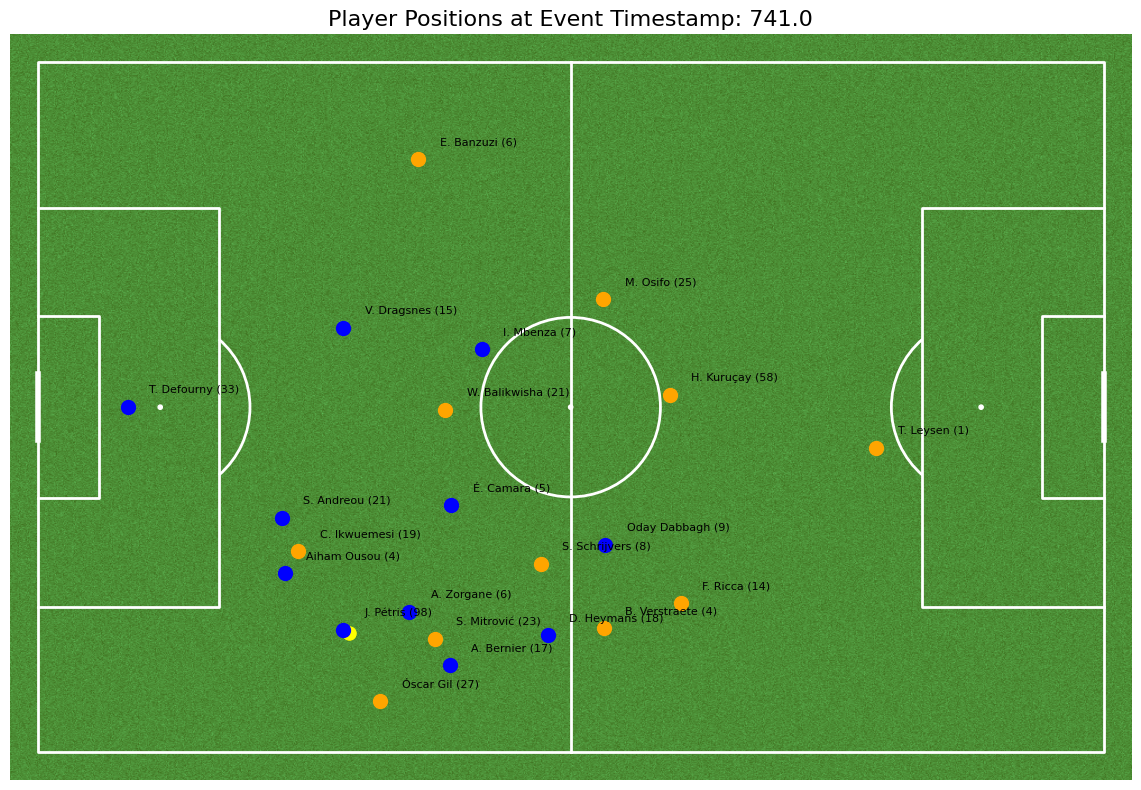

In [310]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import matplotlib as mpl
from IPython.display import clear_output

# Define consistent team colors
colors = ["orange", "blue"]  # Predefined team colors

def plot_tracking_data(tracking_data):
    clear_output(wait=True)

    # Define pitch dimensions and colors
    pitch = Pitch(pitch_color='grass', line_color='white', pitch_type='opta',
                  pitch_length=105, pitch_width=68)
    fig, ax = pitch.draw(figsize=(12, 8))

    # Extract timestamp
    timestamp = tracking_data['timestamp'].iloc[0]
    
    # Assign colors to teams based on sorted order
    team_names = sorted(tracking_data['team_id'].unique())  # Sort to maintain consistency
    team_colors = {team: colors[i % len(colors)] for i, team in enumerate(team_names)}

    # Plot player positions
    for _, row in tracking_data.iterrows():
        x, y = row['x'], row['y']
        player_name = row['player_name']
        team_name = row['team_id']
        jersey_no = row['jersey_number']

        # Plot the ball
        if player_name == 'Ball':
            pitch.scatter(x, y, s=90, color='yellow', ax=ax, label='Ball')
        else:
            # Plot players with consistent team colors
            pitch.scatter(x, y, s=100, color=team_colors[team_name], ax=ax, label=team_name)

        # Add player names (excluding the ball)
        if player_name != 'Ball':
            ax.text(x + 2, y + 2, f"{player_name} ({jersey_no})", fontsize=8)

    # Set title
    ax.set_title(f'Player Positions at Event Timestamp: {timestamp}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Iterate over frames and plot tracking data
for i in range(int(max(subset['timestamp']) - min(subset['timestamp']) + 1)):
    frame_id = subset['frame_id'].unique()[i]
    filtered_tracking_df = subset[subset['frame_id'] == frame_id]
    plot_tracking_data(filtered_tracking_df)


In [318]:

# Filter only the ball data
ball_df = df_tracking[df_tracking['player_name'] == 'Ball']

valid_times = []

# Loop through important times (when opponent loses ball)
for time in df_time['seconds']:
    # Get ball position at the moment of possession loss
    initial_ball_pos = ball_df[ball_df['timestamp'] == time]

    # Ensure ball starts on our side (x ≤ 50)
    if not initial_ball_pos.empty and initial_ball_pos.iloc[0]['x'] <= 50:
        # Get ball movement in the next 5 seconds
        ball_movement = ball_df[(ball_df['timestamp'] > time) & (ball_df['timestamp'] <= time + 5)]

        # Check if the ball ever crosses x = 50
        if not ball_movement[ball_movement['x'] > 50].empty:
            valid_times.append(time)

# Create a filtered DataFrame with only the valid times
filtered_df_time = df_time[df_time['seconds'].isin(valid_times)]

# Print or use the filtered times
print(filtered_df_time)


        seconds
133299    548.0
227849    851.0
860249   2734.0


In [339]:
time = filtered_df_time.iloc[2]['seconds']
print(time)
subset_transition = df_tracking[((df_tracking['timestamp'] >= time -10 ) & (df_tracking['timestamp'] < time + 10)) & (df_tracking['period_id'] == 1)]
subset_transition

2734.0


id                    game_id       frame_id  timestamp  \
62629  12672982  6p4xcllb1x7vx1xljrk14gbh0  1729961124000     2724.0   
62630  12672983  6p4xcllb1x7vx1xljrk14gbh0  1729961124000     2724.0   
62631  12672984  6p4xcllb1x7vx1xljrk14gbh0  1729961124000     2724.0   
62632  12672985  6p4xcllb1x7vx1xljrk14gbh0  1729961124000     2724.0   
62633  12672986  6p4xcllb1x7vx1xljrk14gbh0  1729961124000     2724.0   
...         ...                        ...            ...        ...   
63084  12674437  6p4xcllb1x7vx1xljrk14gbh0  1729961143000     2743.0   
63085  12674438  6p4xcllb1x7vx1xljrk14gbh0  1729961143000     2743.0   
63086  12674439  6p4xcllb1x7vx1xljrk14gbh0  1729961143000     2743.0   
63087  12674440  6p4xcllb1x7vx1xljrk14gbh0  1729961143000     2743.0   
63088  12674441  6p4xcllb1x7vx1xljrk14gbh0  1729961143000     2743.0   

       period_id                  player_id          x          y  \
62629          1                       ball  88.360000  36.414636   
62630          1  87d73x3gkomc4soukr5uweqc5  63.147526  61.762836   
62631          1  5ecklu1u6t21rhh8fh4zoq2cq  51.734098  30.051855   
62632          1  4juerzftkeiuzctoiei6dmtp1  64.443017  25.878509   
62633          1  ae26s08xs4l50sfm0r6jbsley  43.652787  48.150820   
...          ...                        ...        ...        ...   
63084          1  7zmgaactx19n77j9fl08pahyi  85.366000  37.001600   
63085          1  4j9ug0ng9dhx6xwhdwx6fafx0  49.017377  30.751218   
63086          1  7swhmqhii6ny7eod10df6dc6h  39.512716  11.451019   
63087          1  ezg4lhvy2z4pkyvfrmi17y11x  54.539344   8.618374   
63088          1  cllq8xizuqut48xxqc3btz97u  42.432131  36.266200   

         player_name                    team_id  jersey_number  \
62629           Ball  1oyb7oym5nwzny8vxf03szd2h              0   
62630      I. Mbenza  920raeoumft3q2wmvc296uceo              7   
62631     A. Zorgane  920raeoumft3q2wmvc296uceo              6   
62632       F. Ricca  bw9wm8pqfzcchumhiwdt2w15c             14   
62633     S. Andreou  920raeoumft3q2wmvc296uceo             21   
...              ...                        ...            ...   
63084      T. Leysen  bw9wm8pqfzcchumhiwdt2w15c              1   
63085     E. Banzuzi  bw9wm8pqfzcchumhiwdt2w15c              6   
63086      J. Pétris  920raeoumft3q2wmvc296uceo             98   
63087  B. Verstraete  bw9wm8pqfzcchumhiwdt2w15c              4   
63088  W. Balikwisha  bw9wm8pqfzcchumhiwdt2w15c             21   

                        match_id  
62629  6p4xcllb1x7vx1xljrk14gbh0  
62630  6p4xcllb1x7vx1xljrk14gbh0  
62631  6p4xcllb1x7vx1xljrk14gbh0  
62632  6p4xcllb1x7vx1xljrk14gbh0  
62633  6p4xcllb1x7vx1xljrk14gbh0  
...                          ...  
63084  6p4xcllb1x7vx1xljrk14gbh0  
63085  6p4xcllb1x7vx1xljrk14gbh0  
63086  6p4xcllb1x7vx1xljrk14gbh0  
63087  6p4xcllb1x7vx1xljrk14gbh0  
63088  6p4xcllb1x7vx1xljrk14gbh0  

[460 rows x 12 columns]

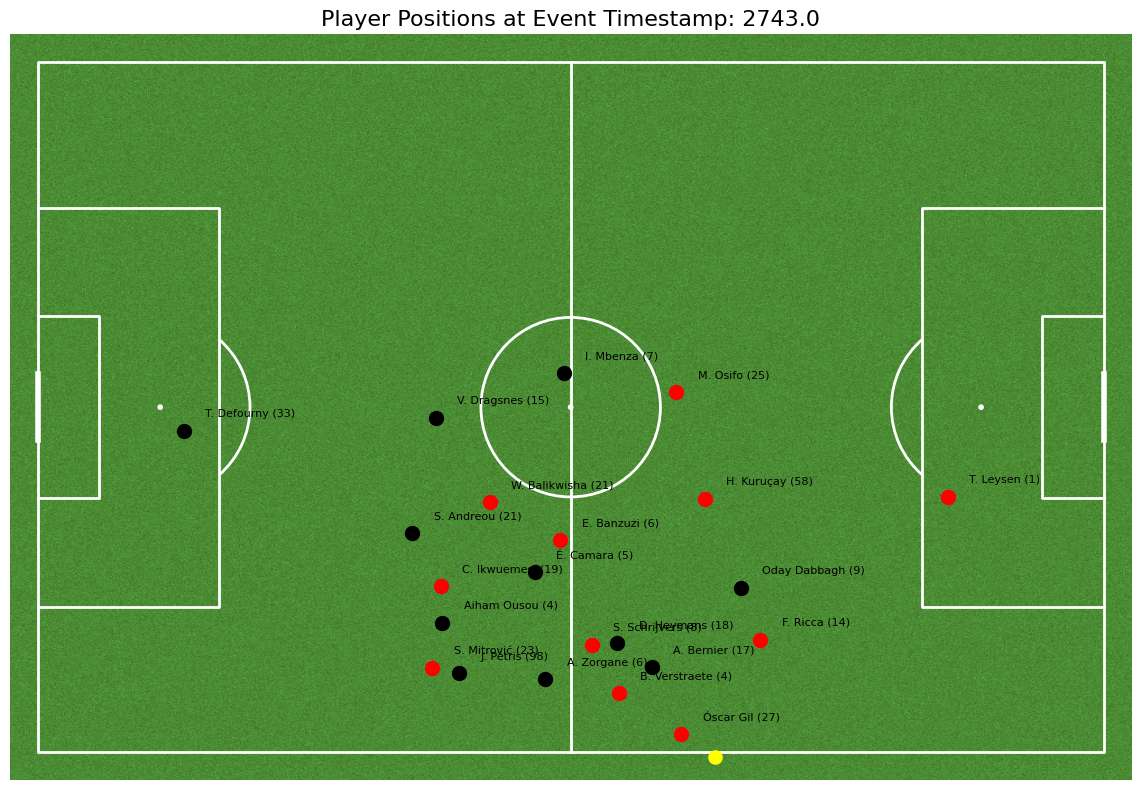

In [337]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import matplotlib as mpl
from IPython.display import clear_output

# Define consistent team colors
colors = ["red", "black"]  # Predefined team colors

def plot_tracking_data_transaction(tracking_data):
    clear_output(wait=True)

    # Define pitch dimensions and colors
    pitch = Pitch(pitch_color='grass', line_color='white', pitch_type='opta',
                  pitch_length=105, pitch_width=68)
    fig, ax = pitch.draw(figsize=(12, 8))

    # Extract timestamp
    timestamp = tracking_data['timestamp'].iloc[0]
    
    # Assign colors to teams based on sorted order
    team_names = sorted(tracking_data['team_id'].unique())  # Sort to maintain consistency
    team_colors = {team: colors[i % len(colors)] for i, team in enumerate(team_names)}

    # Plot player positions
    for _, row in tracking_data.iterrows():
        x, y = row['x'], row['y']
        player_name = row['player_name']
        team_name = row['team_id']
        jersey_no = row['jersey_number']

        # Plot the ball
        if player_name == 'Ball':
            pitch.scatter(x, y, s=90, color='yellow', ax=ax, label='Ball')
        else:
            # Plot players with consistent team colors
            pitch.scatter(x, y, s=100, color=team_colors[team_name], ax=ax, label=team_name)

        # Add player names (excluding the ball)
        if player_name != 'Ball':
            ax.text(x + 2, y + 2, f"{player_name} ({jersey_no})", fontsize=8)

    # Set title
    ax.set_title(f'Player Positions at Event Timestamp: {timestamp}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Iterate over frames and plot tracking data
for i in range(int(max(subset_transition['timestamp']) - min(subset_transition['timestamp']) + 1)):
    frame_id = subset_transition['frame_id'].unique()[i]
    filtered_tracking_df = subset_transition[subset_transition['frame_id'] == frame_id]
    plot_tracking_data(filtered_tracking_df)


In [331]:
query_spadl = """
SELECT spa.* ,team_name, player_name  FROM spadl_actions spa
JOIN players p on spa.player_id = p.player_id
JOIN teams t on spa.team_id = t.team_id
WHERE spa.game_id = '6p4xcllb1x7vx1xljrk14gbh0' AND spa.period_id = 1
ORDER BY seconds ASC
"""

df_spadl = pd.read_sql_query(query_spadl, conn)


df_spadl_formatted = df_spadl.rename(columns={"action_type": "type_id"})

# Ensure type_id is an integer
df_spadl_formatted["type_id"] = df_spadl_formatted["type_id"].astype(int)
df_spadl_formatted["result_id"] = df_spadl_formatted["result"].astype(int)
df_spadl_formatted["bodypart_id"] = df_spadl_formatted["bodypart"].astype(int)



# Apply add_names to map numeric values to labels
df_spadl_formatted_success = spadl.add_names(df_spadl_formatted)

df_spadl_formatted_success



id                    game_id  period_id  seconds  \
0    155531  6p4xcllb1x7vx1xljrk14gbh0          1      0.0   
1    155532  6p4xcllb1x7vx1xljrk14gbh0          1      1.0   
2    155533  6p4xcllb1x7vx1xljrk14gbh0          1      2.0   
3    155534  6p4xcllb1x7vx1xljrk14gbh0          1      5.0   
4    155535  6p4xcllb1x7vx1xljrk14gbh0          1      8.0   
..      ...                        ...        ...      ...   
769  156300  6p4xcllb1x7vx1xljrk14gbh0          1   2871.0   
770  156301  6p4xcllb1x7vx1xljrk14gbh0          1   2873.0   
771  156302  6p4xcllb1x7vx1xljrk14gbh0          1   2874.0   
772  156303  6p4xcllb1x7vx1xljrk14gbh0          1   2875.0   
773  156304  6p4xcllb1x7vx1xljrk14gbh0          1   2877.0   

                     player_id                    team_id  start_x  start_y  \
0     upsv29k59dhj8w1nm3oqveok  bw9wm8pqfzcchumhiwdt2w15c   52.500   34.000   
1    em3hp3y4xma6guuplqgpqf7c9  bw9wm8pqfzcchumhiwdt2w15c   71.610   42.636   
2    em3hp3y4xma6guuplqgpqf7c9  bw9wm8pqfzcchumhiwdt2w15c   76.125   39.100   
3    4juerzftkeiuzctoiei6dmtp1  bw9wm8pqfzcchumhiwdt2w15c   75.705   25.568   
4    4juerzftkeiuzctoiei6dmtp1  bw9wm8pqfzcchumhiwdt2w15c   76.965   21.828   
..                         ...                        ...      ...      ...   
769  5ecklu1u6t21rhh8fh4zoq2cq  920raeoumft3q2wmvc296uceo   42.945   29.512   
770  5ecklu1u6t21rhh8fh4zoq2cq  920raeoumft3q2wmvc296uceo   49.035   26.996   
771  14xb29tv90y8uataijmh03rah  920raeoumft3q2wmvc296uceo   56.910    8.500   
772  7swhmqhii6ny7eod10df6dc6h  920raeoumft3q2wmvc296uceo   51.135   11.084   
773  14xb29tv90y8uataijmh03rah  920raeoumft3q2wmvc296uceo   57.645    2.652   

      end_x   end_y  type_id result bodypart           team_name  \
0    71.610  42.636        0      1        0           OH Leuven   
1    76.125  39.100       21      1        0           OH Leuven   
2    75.705  25.568        0      1        0           OH Leuven   
3    76.965  21.828       21      1        0           OH Leuven   
4    97.020  36.312        0      1        0           OH Leuven   
..      ...     ...      ...    ...      ...                 ...   
769  49.035  26.996       21      1        0  Sporting Charleroi   
770  58.275   8.432        0      1        0  Sporting Charleroi   
771  50.085   8.908        0      1        0  Sporting Charleroi   
772  58.905   4.284        0      1        0  Sporting Charleroi   
773  51.870   7.480        0      1        0  Sporting Charleroi   

      player_name  result_id  bodypart_id type_name result_name bodypart_name  
0    C. Ikwuemesi          1            0      pass     success          foot  
1      H. Kuruçay          1            0   dribble     success          foot  
2      H. Kuruçay          1            0      pass     success          foot  
3        F. Ricca          1            0   dribble     success          foot  
4        F. Ricca          1            0      pass     success          foot  
..            ...        ...          ...       ...         ...           ...  
769    A. Zorgane          1            0   dribble     success          foot  
770    A. Zorgane          1            0      pass     success          foot  
771    D. Heymans          1            0      pass     success          foot  
772     J. Pétris          1            0      pass     success          foot  
773    D. Heymans          1            0      pass     success          foot  

[774 rows x 20 columns]

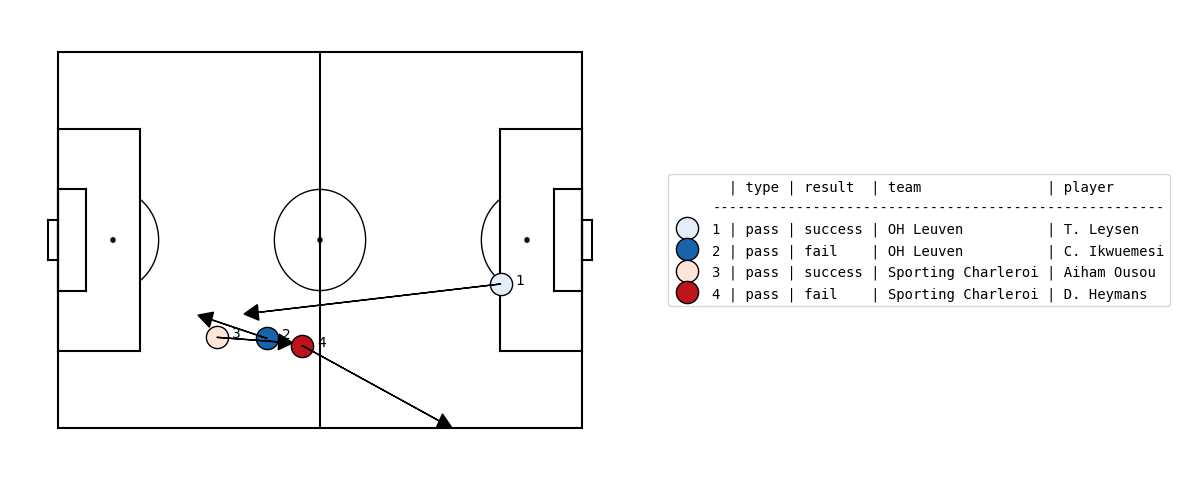

In [345]:
import pandas as pd
import matplotsoccer

chosen_index = 2

chosen_time = filtered_df_time.iloc[chosen_index]["seconds"]

before_fail = 10
after_fail = 10

filtered_actions = df_spadl_formatted_success[
    (df_spadl_formatted_success["seconds"] >= (chosen_time - before_fail)) &
    (df_spadl_formatted_success["seconds"] <= (chosen_time + after_fail))
]

matplotsoccer.actions(
    location=filtered_actions[["start_x", "start_y", "end_x", "end_y"]].values,
    action_type=filtered_actions["type_name"].values,
    result=filtered_actions["result_name"].values,
    team=filtered_actions["team_name"].values,
    label=filtered_actions[["type_name", "result_name", "team_name", "player_name"]].values,
    labeltitle=["type", "result", "team", "player"],

    zoom=False,
    figsize=8 
)
